<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


Load the dataset into a dataframe.


In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


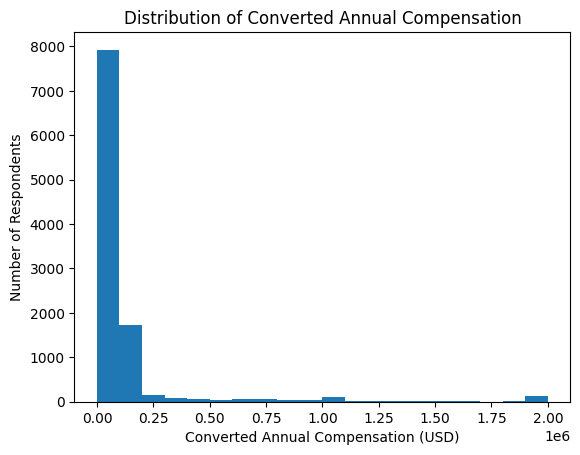

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64


In [6]:
# your code goes here
# Plot the distribution of 'ConvertedComp'
df['ConvertedComp'].plot.hist(bins=20)  # Adjust the number of bins as needed
plt.xlabel('Converted Annual Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Converted Annual Compensation')
plt.show()

# Additional analysis (optional)
# Calculate descriptive statistics
print(df['ConvertedComp'].describe())

Plot the histogram for the column `ConvertedComp`.


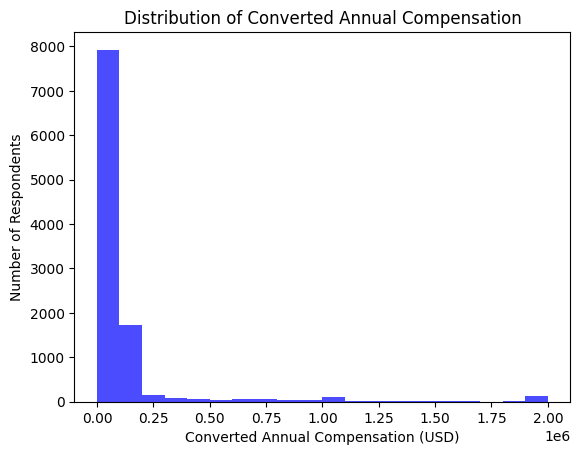

In [7]:
# Plot the histogram
plt.hist(df['ConvertedComp'], bins=20, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Converted Annual Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Converted Annual Compensation')

plt.show()


What is the median of the column `ConvertedComp`?


In [8]:
# Calculate the median of 'ConvertedComp'
median_comp = df['ConvertedComp'].median()

# Print the median
print(median_comp)


57745.0


How many responders identified themselves only as a **Man**?


In [9]:
men_only = df[df['Gender'] == 'Man']

# Count the number of respondents
n_men_only = men_only.shape[0]

# Print the count
print(n_men_only)


10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
# Filter for respondents who identified as 'Woman'
women_only = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp
median_comp_women = women_only['ConvertedComp'].median()

# Print the median
print(median_comp_women)


57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
# Calculate the five-number summary
five_number_summary = df['Age'].describe(percentiles=[0.25, 0.5, 0.75])

# Print the five-number summary
print(five_number_summary)


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


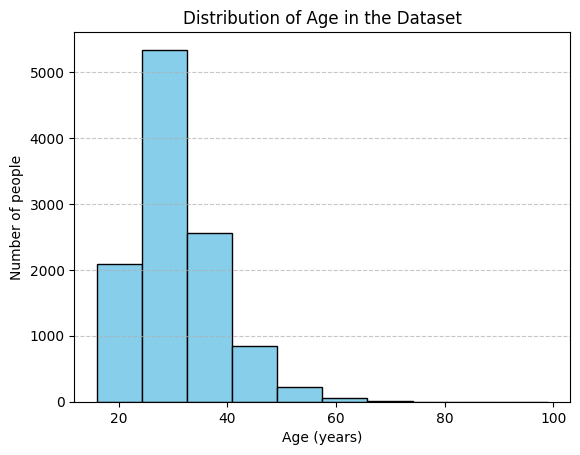

In [12]:
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('Age (years)')
plt.ylabel('Number of people')
plt.title('Distribution of Age in the Dataset')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


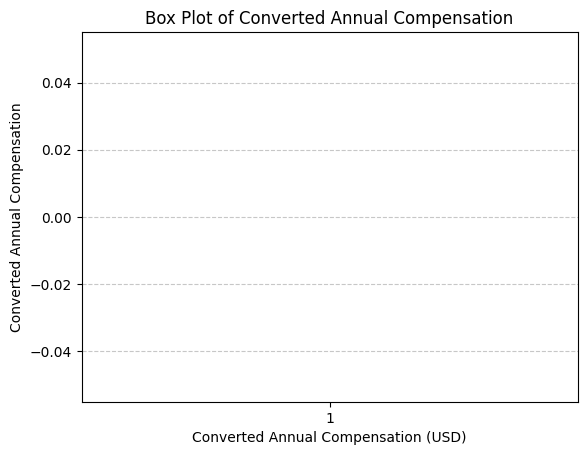

In [15]:
# Create a box plot
plt.boxplot(df['ConvertedComp'])

# Add labels and title
plt.xlabel('Converted Annual Compensation (USD)')
plt.ylabel('Converted Annual Compensation')
plt.title('Box Plot of Converted Annual Compensation')

# Customize the plot (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines

plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [19]:

# Calculate the IQR (Interquartile Range)
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1

# Print IQR
print("Interquartile Range (IQR):", iqr)


Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [20]:
# your code goes here
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [23]:
# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of outliers:", num_outliers)


Number of outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [27]:
# Create a new DataFrame without outliers
df_no_outliers = outliers.copy()

# Print the new DataFrame
print(df_no_outliers)


       Respondent                                         MainBranch Hobbyist  \
3              16                     I am a developer by profession      Yes   
13             32                     I am a developer by profession       No   
45            100                     I am a developer by profession      Yes   
46            102                     I am a developer by profession       No   
60            128  I am not primarily a developer, but I write co...      Yes   
...           ...                                                ...      ...   
11296       24915                     I am a developer by profession      Yes   
11303       24931                     I am a developer by profession       No   
11350       25036                     I am a developer by profession      Yes   
11353       25047                     I am a developer by profession      Yes   
11369       25086                     I am a developer by profession      Yes   

                           

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
# your code goes here


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
